In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 📊 Análise dos Dados

Esta seção apresenta a análise estatística dos dados obtidos a partir da simulação do protocolo **CSMA/CD** implementado no arquivo `csma_cd_simulation.py`.

A simulação foi executada **60 vezes**, sendo:

- **10 execuções** para cada um dos seguintes números de transmissores: **4, 8 e 12**
- Para **dois valores diferentes de tempo de espera** entre tentativas quando o canal está ocupado: **0.5s** e **0.05s**

### 🧪 Configuração da Simulação

Em cada execução:
- Cada transmissor tenta enviar **5 pacotes**.
- O tempo de transmissão de cada pacote é aleatório, entre **0.5s e 1.5s** por padrão (ajustável).

### 📈 Métricas Coletadas

Durante a simulação, foram registradas as seguintes métricas:

- **Tempo total da simulação**
- **Tempo total de transmissão (canal ocupado)**
- **Tempo ocioso do canal**
- **Desempenho (%) de utilização do canal**
- **Total de colisões**
- **Colisões por transmissor**
- **Tentativas por transmissor**

### 📂 Origem dos Dados

As estatísticas foram salvas automaticamente no arquivo `estatisticas.txt` após cada execução e consolidadas manualmente no arquivo `Testes_realizados.xlsx`, que contém os registros organizados em abas separadas por configuração.

### 📊 Visualizações a seguir

Os gráficos e tabelas abaixo comparam os desempenhos médios das diferentes configurações, revelando o impacto do número de transmissores e do tempo de espera entre tentativas sobre:

- Eficiência do uso do canal
- Quantidade de colisões
- Tempo total de execução da simulação


In [103]:
dados = pd.read_excel('Testes_realizados.xlsx')

In [104]:
dados.desempenho_de_transmissao = dados.desempenho_de_transmissao * 100

## Análise de Desempenho

### 4 Transmissores

|                         | Tempo total da simulação | Tempo de transmissão | Tempo ocioso | Desempenho | Colisões |
|-------------------------|--------------------------|----------------------|--------------|------------|----------|
| **Pior caso**           | 74.97s                   | 17.16s               | 55.58s       | 25.28%     | 13       |
| **Melhor caso**         | 23.95s                   | 21.70s               | 2.69s        | 88.73%     | 0        |
| **Média**               | 40.53s                   | 19.46s               | 20.97s       | 56.80%     | 4.8      |


### 8 Transmissores

|                         | Tempo total da simulação | Tempo de transmissão | Tempo ocioso | Desempenho | Colisões |
|-------------------------|--------------------------|----------------------|--------------|------------|----------|
| **Pior caso**           | 172.60s                  | 37.07s               | 139.68s      | 21.97%     | 22       |
| **Melhor caso**         | 56.44s                   | 41.65s               | 15.50s       | 72.54%     | 5        |
| **Média**               | 108.15s                  | 39.19s               | 68.96s       | 39.91%     | 11.3     |


### 12 Transmissores

|                         | Tempo total da simulação | Tempo de transmissão | Tempo ocioso | Desempenho | Colisões |
|-------------------------|--------------------------|----------------------|--------------|------------|----------|
| **Pior caso**           | 145.93s                  | 56.06s               | 84.02s       | 42.42%     | 49       |
| **Melhor caso**         | 112.3s                   | 63.58s               | 51.34s       | 54.27%     | 13       |
| **Média**               | 126.68s                  | 59.89s               | 66.79s       | 47.53%     | 26.1     |


## Comparação de média das métricas por número de transmissores

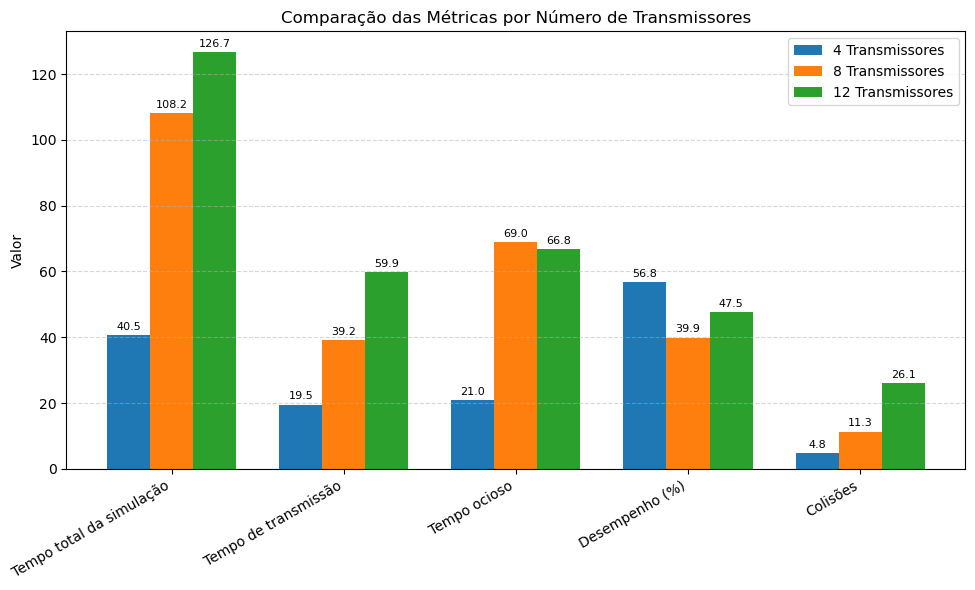

In [ ]:
metricas = [
    "Tempo total da simulação",
    "Tempo de transmissão",
    "Tempo ocioso",
    "Desempenho (%)",
    "Colisões"
]

media_4 = [40.53, 19.46, 20.97, 56.80, 4.8]
media_8 = [108.15, 39.19, 68.96, 39.91, 11.3]
media_12 = [126.68, 59.89, 66.79, 47.53, 26.1]

x = np.arange(len(metricas))
largura = 0.25

plt.figure(figsize=(10, 6))

bars_4 = plt.bar(x - largura, media_4, width=largura, label='4 Transmissores')
bars_8 = plt.bar(x,          media_8, width=largura, label='8 Transmissores')
bars_12 = plt.bar(x + largura, media_12, width=largura, label='12 Transmissores')

# Função para adicionar os valores acima das barras
def adicionar_valores(barras):
    for bar in barras:
        altura = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, altura + 1, f'{altura:.1f}', ha='center', va='bottom', fontsize=8)

adicionar_valores(bars_4)
adicionar_valores(bars_8)
adicionar_valores(bars_12)

plt.xticks(x, metricas, rotation=30, ha='right')
plt.ylabel("Valor")
plt.title("Comparação das Métricas por Número de Transmissores")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


## Comparação do número de colisões por transmissores ao longo das execuções

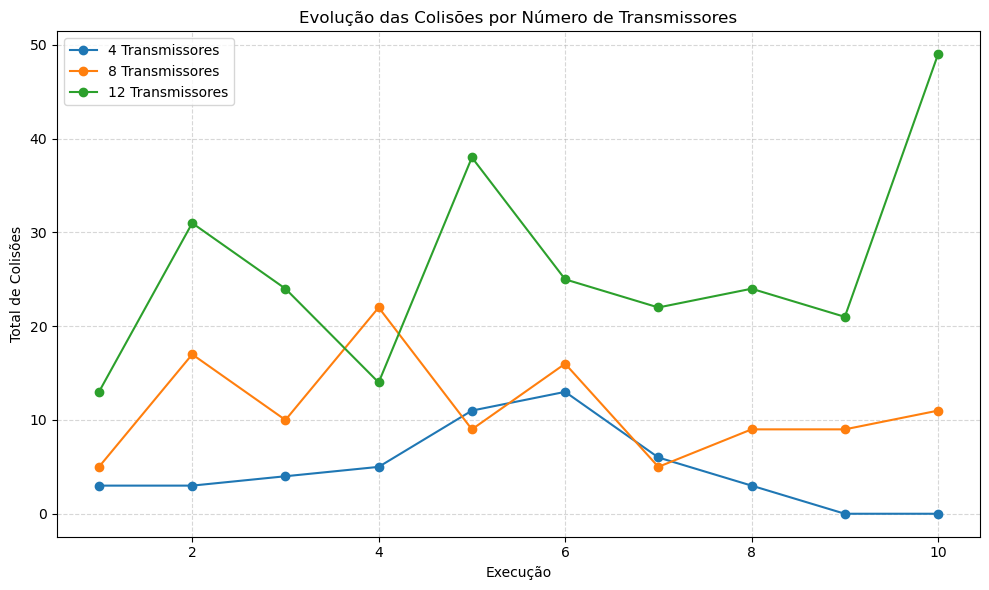

In [ ]:
dados_filtrados = dados[dados['numero_de_transmissores'].isin([4, 8, 12])]

# Agrupa pelos valores de transmissores filtrados
grupos = dados_filtrados.groupby('numero_de_transmissores')

plt.figure(figsize=(10, 6))

for transmissor, grupo in grupos:
    plt.plot(
        range(1, len(grupo) + 1),
        grupo['total_colisoes'],
        marker='o',
        label=f'{transmissor} Transmissores'
    )

plt.title("Evolução das Colisões por Número de Transmissores")
plt.xlabel("Execução")
plt.ylabel("Total de Colisões")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Desempenho do canal por transmissores ao longo das execuções

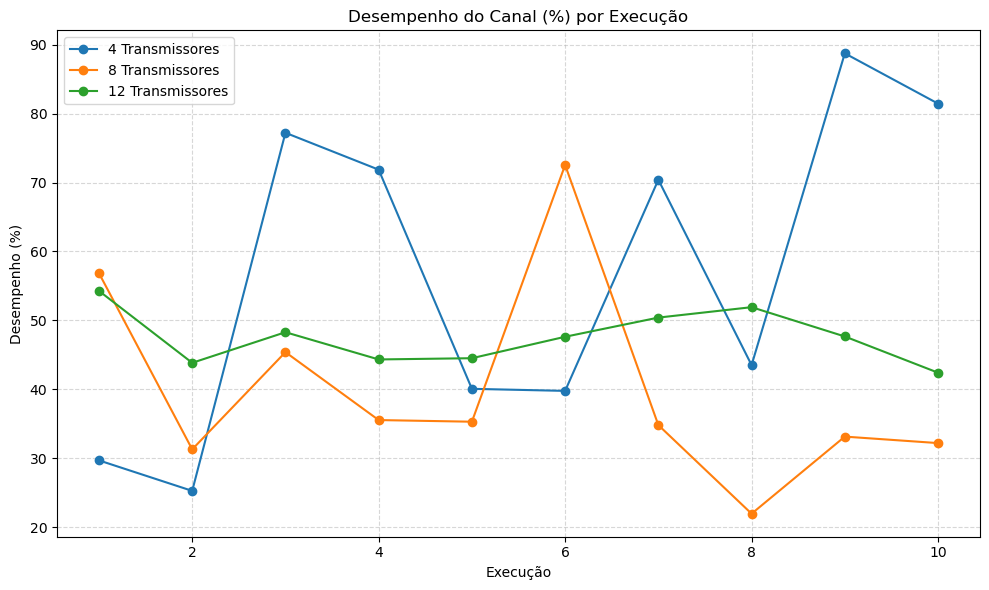

In [155]:
dados_filtrados = dados[dados['numero_de_transmissores'].isin([4, 8, 12])]

grupos = dados_filtrados.groupby('numero_de_transmissores')

plt.figure(figsize=(10, 6))

for transmissor, grupo in grupos:
    plt.plot(
        range(1, len(grupo) + 1),
        grupo['desempenho_de_transmissao'],
        marker='o',
        label=f'{transmissor} Transmissores'
    )

plt.title("Desempenho do Canal (%) por Execução")
plt.xlabel("Execução")
plt.ylabel("Desempenho (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Verificação de relação entre número de colisões e desempenho

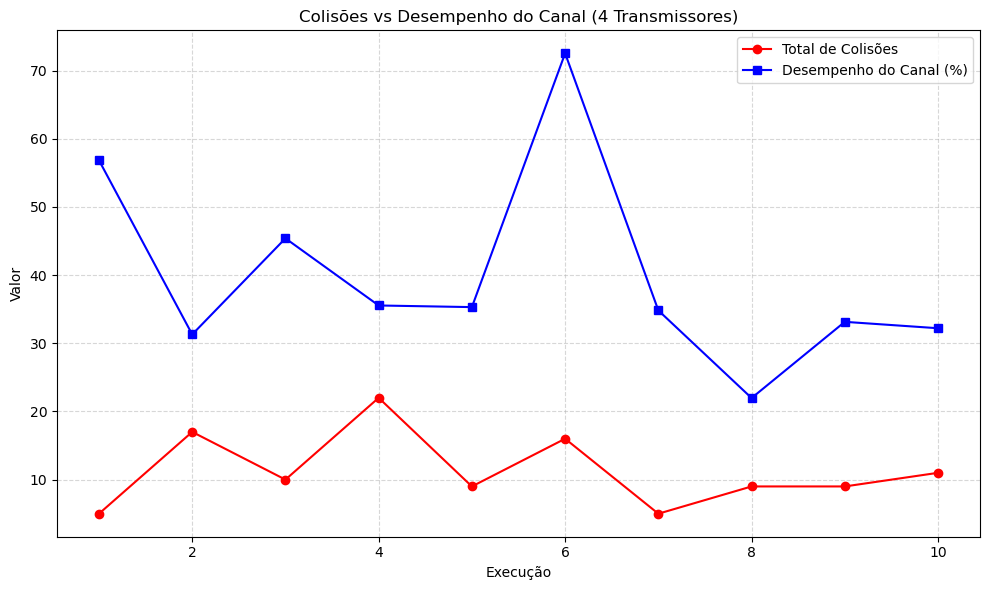

In [ ]:
dados_8 = dados[dados['numero_de_transmissores'] == 8].reset_index(drop=True)

# Eixo X: número da execução
x = range(1, len(dados_8) + 1)

plt.figure(figsize=(10, 6))

# Linha de colisões
plt.plot(x, dados_8['total_colisoes'], marker='o', label='Total de Colisões', color='red')

# Linha de desempenho
plt.plot(x, dados_8['desempenho_de_transmissao'], marker='s', label='Desempenho do Canal (%)', color='blue')

plt.title("Colisões vs Desempenho do Canal (8 Transmissores)")
plt.xlabel("Execução")
plt.ylabel("Valor")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [149]:
dados_valor_menor = pd.read_excel('Testes_realizados.xlsx', sheet_name='valor_espera_menor')

In [150]:
dados_valor_menor.desempenho_de_transmissao = dados_valor_menor.desempenho_de_transmissao * 100

## Comparação de desempenho entre transmissores com backoff de 0.5 e backoff de 0.05

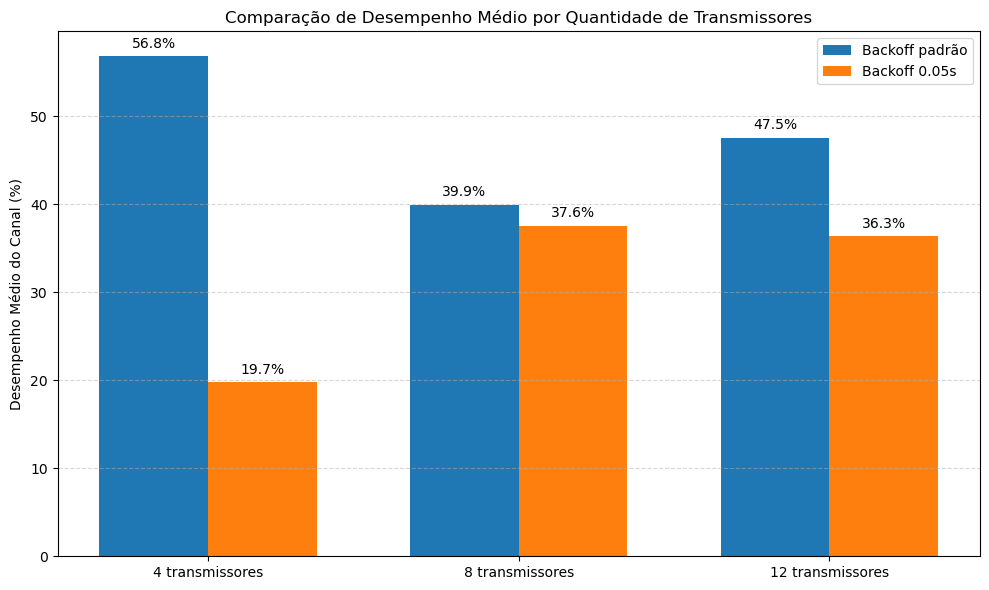

In [ ]:
media1 = dados.groupby('numero_de_transmissores')['desempenho_de_transmissao'].mean()
media2 = dados_valor_menor.groupby('numero_de_transmissores')['desempenho_de_transmissao'].mean()

# Garantir mesma ordem dos índices
transmissores = sorted(set(media1.index).intersection(set(media2.index)))

# Extrair os valores na ordem correta
media1 = media1.loc[transmissores]
media2 = media2.loc[transmissores]

bar_width = 0.35
x = range(len(transmissores))

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], media1, width=bar_width, label='Backoff padrão')
plt.bar([i + bar_width/2 for i in x], media2, width=bar_width, label='Backoff 0.05s')

for i, val in enumerate(media1):
    plt.text(i - bar_width/2, val + 1, f'{val:.1f}%', ha='center')
for i, val in enumerate(media2):
    plt.text(i + bar_width/2, val + 1, f'{val:.1f}%', ha='center')

plt.xticks(x, [f'{n} transmissores' for n in transmissores])
plt.ylabel('Desempenho Médio do Canal (%)')
plt.title('Comparação de Desempenho Médio por Quantidade de Transmissores')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Comparação do número médio de colisões entre transmissores com backoff de 0.5 e backoff de 0.05

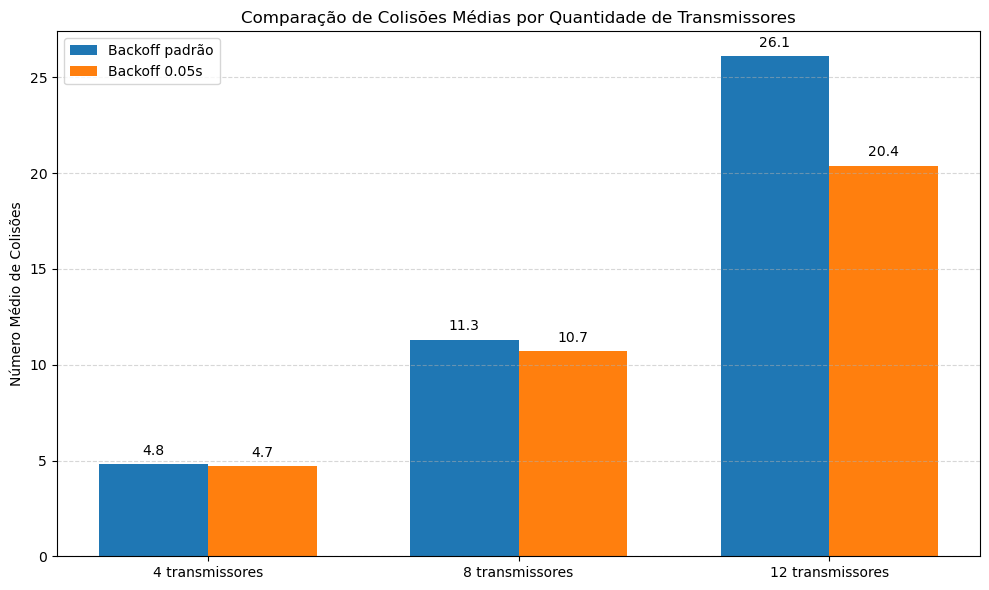

In [ ]:
# Agrupar por número de transmissores e calcular a média de colisões
media_colisoes1 = dados.groupby('numero_de_transmissores')['total_colisoes'].mean()
media_colisoes2 = dados_valor_menor.groupby('numero_de_transmissores')['total_colisoes'].mean()

transmissores = sorted(set(media_colisoes1.index).intersection(set(media_colisoes2.index)))

# Reordenar os valores
media_colisoes1 = media_colisoes1.loc[transmissores]
media_colisoes2 = media_colisoes2.loc[transmissores]

bar_width = 0.35
x = range(len(transmissores))

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], media_colisoes1, width=bar_width, label='Backoff padrão')
plt.bar([i + bar_width/2 for i in x], media_colisoes2, width=bar_width, label='Backoff 0.05s')

for i, val in enumerate(media_colisoes1):
    plt.text(i - bar_width/2, val + 0.5, f'{val:.1f}', ha='center')
for i, val in enumerate(media_colisoes2):
    plt.text(i + bar_width/2, val + 0.5, f'{val:.1f}', ha='center')

plt.xticks(x, [f'{n} transmissores' for n in transmissores])
plt.ylabel('Número Médio de Colisões')
plt.title('Comparação de Colisões Médias por Quantidade de Transmissores')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Comparação de tempo ocioso do canal entre transmissores com backoff de 0.5 e backoff de 0.05

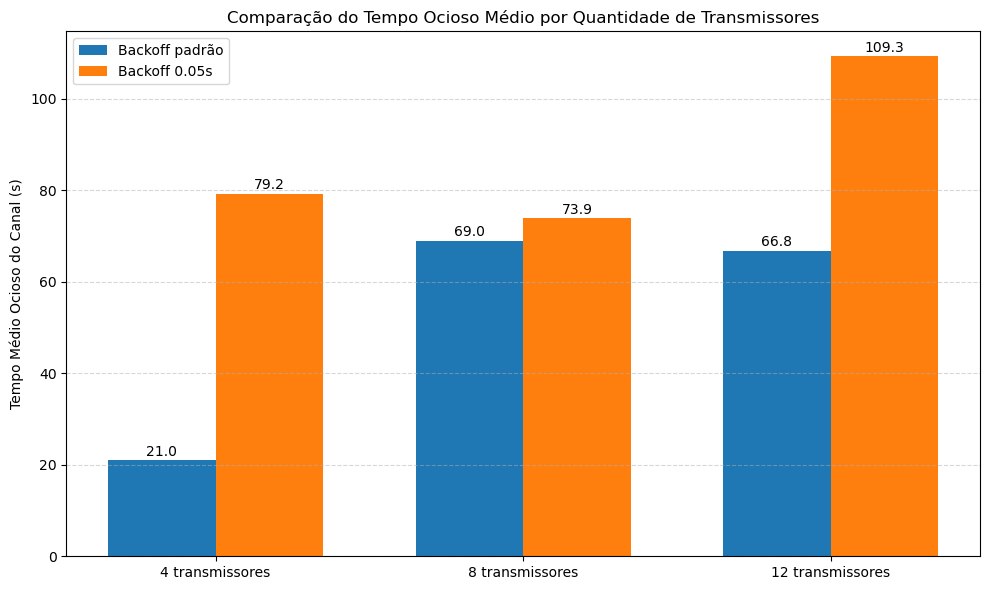

In [ ]:
media_ocioso1 = dados.groupby('numero_de_transmissores')['tempo_ocioso'].mean()
media_ocioso2 = dados_valor_menor.groupby('numero_de_transmissores')['tempo_ocioso'].mean()

transmissores = sorted(set(media_ocioso1.index).intersection(set(media_ocioso2.index)))

media_ocioso1 = media_ocioso1.loc[transmissores]
media_ocioso2 = media_ocioso2.loc[transmissores]

bar_width = 0.35
x = range(len(transmissores))

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], media_ocioso1, width=bar_width, label='Backoff padrão')
plt.bar([i + bar_width/2 for i in x], media_ocioso2, width=bar_width, label='Backoff 0.05s')

for i, val in enumerate(media_ocioso1):
    plt.text(i - bar_width/2, val + 1, f'{val:.1f}', ha='center')
for i, val in enumerate(media_ocioso2):
    plt.text(i + bar_width/2, val + 1, f'{val:.1f}', ha='center')

# Configurações do gráfico
plt.xticks(x, [f'{n} transmissores' for n in transmissores])
plt.ylabel('Tempo Médio Ocioso do Canal (s)')
plt.title('Comparação do Tempo Ocioso Médio por Quantidade de Transmissores')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Testes adicionais com mais transmissores

|                         | Tempo total da simulação | Tempo de transmissão | Tempo ocioso | Desempenho | Colisões |
|-------------------------|--------------------------|----------------------|--------------|------------|----------|
| **20 Transmissores**    | 214.23s                  | 98.6s                | 115.62s      | 46.03%     | 53       |
| **50 Transmissores**    | 462.1s                   | 253.02s              | 209.08s      | 54.75%     | 289      |
| **100 Transmissores**   | 1047.68s                 | 477.52s              | 570.16s      | 45.58%     | 1483     |
